## How to Develop a Neural Net for Predicting Disturbances in the Ionosphere

### This notebook is divided into 4 parts:
* Ionosphere Binary Classification Dataset
* Neural Network Learning Dynamics
* Evaluating and Tuning MLP Models
* Final Model and Make Predictions

### Ionosphere Binary Classification Dataset
We can load the dataset as a pandas DataFrame directly from the URL

In [1]:
# load the ionosphere dataset and summarize the shape
from pandas import read_csv
# define the location of the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/ionosphere.csv'
# load the dataset
df = read_csv(url, header=None)
# summarize shape
print(df.shape)

(351, 35)


               0      1           2           3           4           5   \
count  351.000000  351.0  351.000000  351.000000  351.000000  351.000000   
mean     0.891738    0.0    0.641342    0.044372    0.601068    0.115889   
std      0.311155    0.0    0.497708    0.441435    0.519862    0.460810   
min      0.000000    0.0   -1.000000   -1.000000   -1.000000   -1.000000   
25%      1.000000    0.0    0.472135   -0.064735    0.412660   -0.024795   
50%      1.000000    0.0    0.871110    0.016310    0.809200    0.022800   
75%      1.000000    0.0    1.000000    0.194185    1.000000    0.334655   
max      1.000000    0.0    1.000000    1.000000    1.000000    1.000000   

               6           7           8           9   ...          24  \
count  351.000000  351.000000  351.000000  351.000000  ...  351.000000   
mean     0.550095    0.119360    0.511848    0.181345  ...    0.396135   
std      0.492654    0.520750    0.507066    0.483851  ...    0.578451   
min     -1.000000  

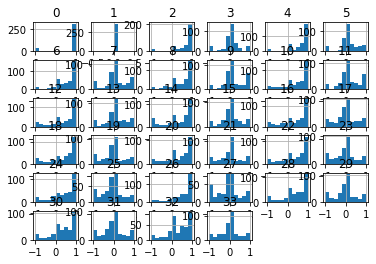

In [2]:
# show summary statistics and plots of the ionosphere dataset
from pandas import read_csv
from matplotlib import pyplot
# define the location of the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/ionosphere.csv'
# load the dataset
df = read_csv(url, header=None)
# show summary statistics
print(df.describe())
# plot histograms
df.hist()
pyplot.show()

In [3]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from matplotlib import pyplot

# split into input and output columns
X, y = df.values[:, :-1], df.values[:, -1]
# ensure all data are floating point values
X = X.astype('float32')
# encode strings to integer
y = LabelEncoder().fit_transform(y)
# split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
# determine the number of input features
n_features = X.shape[1]

### 2. Neural Network Dynamics

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Accuracy: 0.905


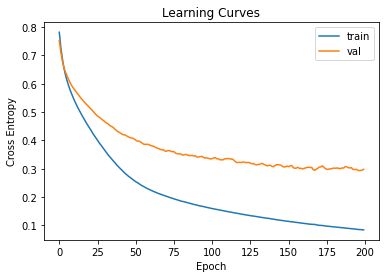

In [4]:
# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(1, activation='sigmoid'))

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy')
# fit the model
history = model.fit(X_train, y_train, epochs=200, batch_size=32, verbose=0, validation_data=(X_test,y_test))
# predict test set
yhat = model.predict_classes(X_test)
# evaluate predictions
score = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % score)
# plot learning curves
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

Accuracy: 0.922


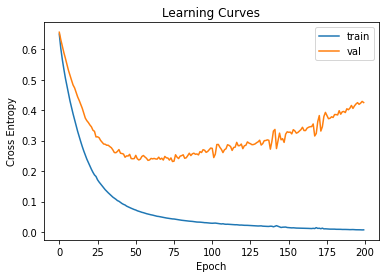

In [5]:
# define model (add another hidden layer)

model = Sequential()
model.add(Dense(50, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(10, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='sigmoid'))

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy')
# fit the model
history = model.fit(X_train, y_train, epochs=200, batch_size=32, verbose=0, validation_data=(X_test,y_test))
# predict test set
yhat = model.predict_classes(X_test)
# evaluate predictions
score = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % score)
# plot learning curves
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

Accuracy: 0.922


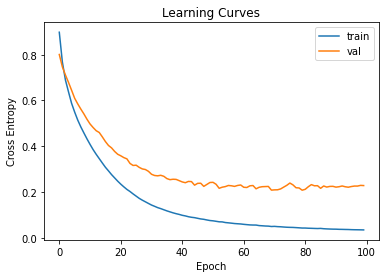

In [6]:
# define model
'''
Finally, we can try a wider network.

We will increase the number of nodes in the first hidden layer from 10 to 50, and in the second hidden layer from 8 to 10.

We will also reduce the number of training epochs from 200 to 100.
'''

model = Sequential()
model.add(Dense(50, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(10, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='sigmoid'))
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy')
# fit the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0, validation_data=(X_test,y_test))
# predict test set
yhat = model.predict_classes(X_test)
# evaluate predictions
score = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % score)
# plot learning curves
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

### 3. Evaluating and Tuning MLP Models

In [7]:
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from matplotlib import pyplot

# prepare cross validation
kfold = StratifiedKFold(10)
# enumerate splits
scores = list()
for train_ix, test_ix in kfold.split(X, y):
	# split data
	X_train, X_test, y_train, y_test = X[train_ix], X[test_ix], y[train_ix], y[test_ix]
	# determine the number of input features
	n_features = X.shape[1]
	# define model
	model = Sequential()
	model.add(Dense(50, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
	model.add(Dense(10, activation='relu', kernel_initializer='he_normal'))
	model.add(Dense(1, activation='sigmoid'))
	# compile the model
	model.compile(optimizer='adam', loss='binary_crossentropy')
	# fit the model
	model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)
	# predict test set
	yhat = model.predict_classes(X_test)
	# evaluate predictions
	score = accuracy_score(y_test, yhat)
	print('>%.3f' % score)
	scores.append(score)
# summarize all scores
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

>0.917
>0.943
>0.943
>0.829
>0.943
>0.943
>0.943
>1.000
>0.971
>0.914
Mean Accuracy: 0.935 (0.042)


In [9]:
'''
Next, let’s try adding regularization to reduce overfitting of the model.

In this case, we can add dropout layers between the hidden layers of the network.
'''
from tensorflow.keras.layers import Dropout

# prepare cross validation
kfold = StratifiedKFold(10)
# enumerate splits
scores = list()
for train_ix, test_ix in kfold.split(X, y):
	# split data
	X_train, X_test, y_train, y_test = X[train_ix], X[test_ix], y[train_ix], y[test_ix]
	# determine the number of input features
	n_features = X.shape[1]
	# define model
	model = Sequential()
	model.add(Dense(50, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
	model.add(Dropout(0.4))
	model.add(Dense(10, activation='relu', kernel_initializer='he_normal'))
	model.add(Dropout(0.4))
	model.add(Dense(1, activation='sigmoid'))
	# compile the model
	model.compile(optimizer='adam', loss='binary_crossentropy')
	# fit the model
	model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)
	# predict test set
	yhat = model.predict_classes(X_test)
	# evaluate predictions
	score = accuracy_score(y_test, yhat)
	print('>%.3f' % score)
	scores.append(score)
# summarize all scores
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))


>0.972
>0.971
>0.943
>0.886
>0.943
>0.943
>0.971
>1.000
>1.000
>0.943
Mean Accuracy: 0.957 (0.032)


In [10]:
'''
Finally, we will try reducing the batch size from 32 down to 8.

This will result in more noisy gradients and may also slow down the speed at which the model is learning the problem.
'''

# prepare cross validation
kfold = StratifiedKFold(10)
# enumerate splits
scores = list()
for train_ix, test_ix in kfold.split(X, y):
	# split data
	X_train, X_test, y_train, y_test = X[train_ix], X[test_ix], y[train_ix], y[test_ix]
	# determine the number of input features
	n_features = X.shape[1]
	# define model
	model = Sequential()
	model.add(Dense(50, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
	model.add(Dropout(0.4))
	model.add(Dense(10, activation='relu', kernel_initializer='he_normal'))
	model.add(Dropout(0.4))
	model.add(Dense(1, activation='sigmoid'))
	# compile the model
	model.compile(optimizer='adam', loss='binary_crossentropy')
	# fit the model
	model.fit(X_train, y_train, epochs=100, batch_size=8, verbose=0)
	# predict test set
	yhat = model.predict_classes(X_test)
	# evaluate predictions
	score = accuracy_score(y_test, yhat)
	print('>%.3f' % score)
	scores.append(score)
# summarize all scores
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

>0.917
>0.971
>0.914
>0.857
>0.914
>0.943
>0.971
>1.000
>0.971
>0.943
Mean Accuracy: 0.940 (0.039)


### 4. Final Model and Make Predictions


In [11]:
'''
Once we choose a model configuration, we can train a final model on all available data and use it to make predictions on new data.

In this case, we will use the model with dropout and a small batch size as our final model.

We can prepare the data and fit the model as before, although on the entire dataset instead of a training subset of the dataset.
'''

# fit a final model and make predictions on new data for the ionosphere dataset
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
# load the dataset
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/ionosphere.csv'
df = read_csv(path, header=None)
# split into input and output columns
X, y = df.values[:, :-1], df.values[:, -1]
# ensure all data are floating point values
X = X.astype('float32')
# encode strings to integer
le = LabelEncoder()
y = le.fit_transform(y)
# determine the number of input features
n_features = X.shape[1]
# define model
model = Sequential()
model.add(Dense(50, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dropout(0.4))
model.add(Dense(10, activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy')
# fit the model
model.fit(X, y, epochs=100, batch_size=8, verbose=0)

In [12]:
import tensorflow as tf
from sklearn import preprocessing

# define a row of new data
row = [[1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300]]

print(len(row))
# make prediction
yhat = model.predict_classes(X[0:1])
# invert transform to get label for class
yhat = le.inverse_transform(yhat)
# report prediction
print('Predicted: %s' % (yhat[0]))

1
Predicted: g
